In [2]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [3]:
image_filter = 'in.jpg'

In [9]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

In [10]:
A_avg = np.ones((3,3)) / 9
A_avg

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [11]:
gray_image = np.zeros([image.shape[0],image.shape[1]])
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        gray_image[y,x]= 0.2989 * image[y,x,0] + 0.5870 * image[y,x,1] + 0.1140 * image[y,x,2] 
gray_image  = np.round(gray_image)
gray_image = gray_image.astype(int)

### ADAPTIVE_THRESH_MEAN_C 

In [28]:
def adap_thres_mean_C(image, Max_Value, filter_mask_size, C):
    # build filter mask
    filter_mask = np.ones((filter_mask_size,filter_mask_size)) / (filter_mask_size * filter_mask_size)
    
    convolved_image = np.zeros_like(image)
    offset_y = filter_mask_size // 2
    offset_x = filter_mask_size // 2
    
    # Explicitly zero-pad the original image
    image_pad = np.zeros((image.shape[0] + 2 * offset_y, image.shape[1] + 2 * offset_x), dtype=image.dtype)
    image_pad[offset_y:offset_y+image.shape[0], offset_x:offset_x+image.shape[1]] = image
    
    # Convolve
    for cy in range(convolved_image.shape[0]):
        for cx in range(convolved_image.shape[1]):
            # Extract image patch of the same size as the mask centered around the current pixel,
            # multiply it element-wise with the mask, and accumulate the results.
            patch = image_pad[cy:cy+filter_mask.shape[0], cx:cx+filter_mask.shape[1]]
            T = np.sum(patch * filter_mask) -C
            
            if image[cy, cx] > T :
                convolved_image[cy, cx] = Max_Value
                #convolved_image[cy, cx] = np.max(patch)
            else:
                convolved_image[cy, cx] = 0
    
    return convolved_image

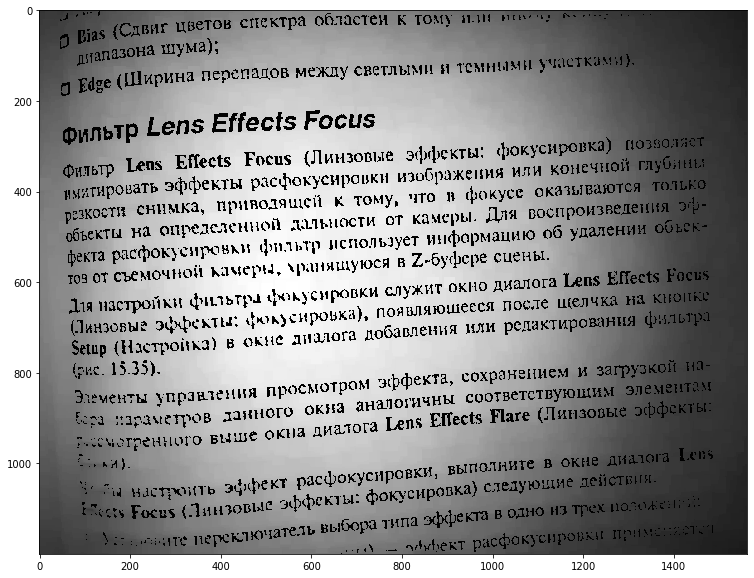

Wall time: 51.4 s


In [23]:
%%time
convolved_image1 = adap_thres_mean_C(gray_image, 25,10)
plt.figure(figsize=(20,10))
plt.imshow(convolved_image1, cmap="gray")
plt.show()

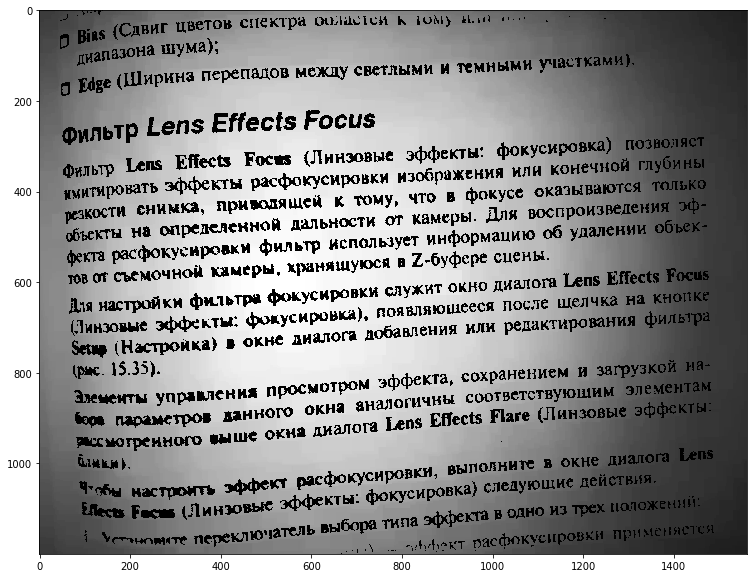

Wall time: 1min 11s


In [24]:
%%time
convolved_image1 = adap_thres_mean_C(gray_image, 55,10)
plt.figure(figsize=(20,10))
plt.imshow(convolved_image1, cmap="gray")
plt.show()

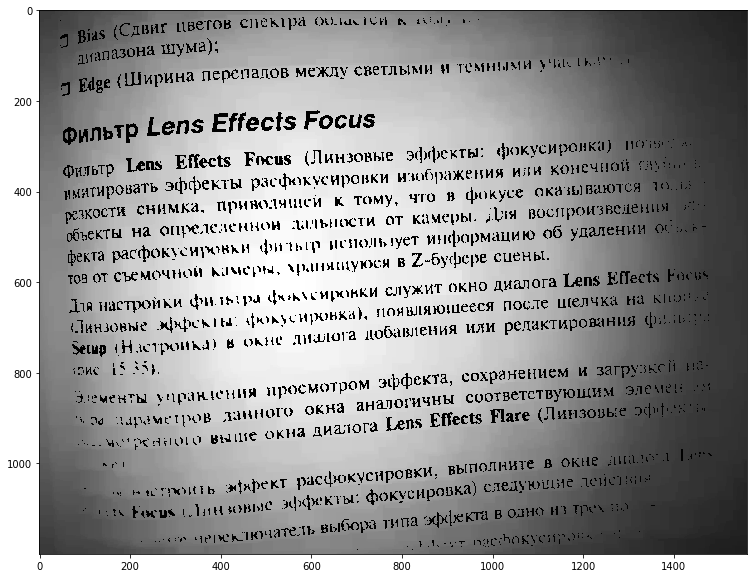

Wall time: 1min 6s


In [25]:
%%time
convolved_image1 = adap_thres_mean_C(gray_image, 55,20)
plt.figure(figsize=(20,10))
plt.imshow(convolved_image1, cmap="gray")
plt.show()

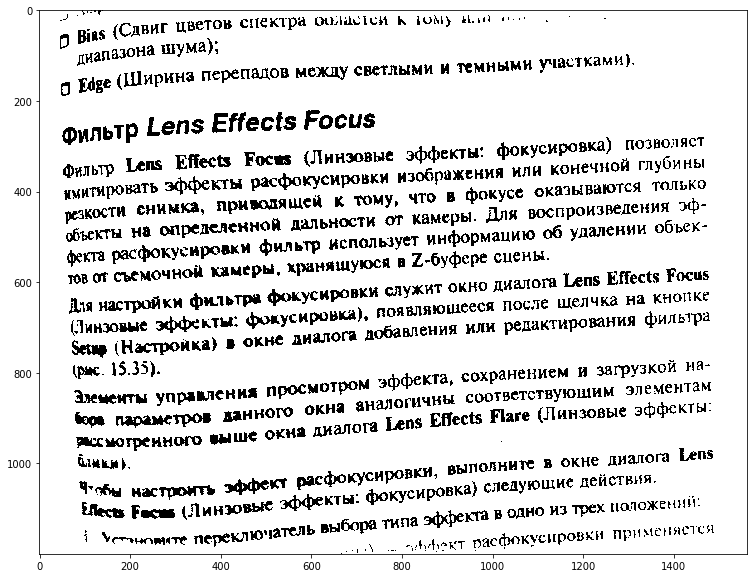

Wall time: 44.6 s


In [29]:
%%time
convolved_image1 = adap_thres_mean_C(gray_image,255, 55,10)
plt.figure(figsize=(20,10))
plt.imshow(convolved_image1, cmap="gray")
plt.show()